<a href="https://colab.research.google.com/github/JinkyoHan/HermiNN/blob/main/DNN_failed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_253 (Dense)           (None, 5)                 10        
                                                                 
 dense_254 (Dense)           (None, 5)                 30        
                                                                 
 dense_255 (Dense)           (None, 5)                 30        
                                                                 
 dense_256 (Dense)           (None, 5)                 30        
                                                                 
 dense_257 (Dense)           (None, 1)                 6         
                                                                 
Total params: 106 (424.00 Byte)
Trainable params: 106 (424.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50

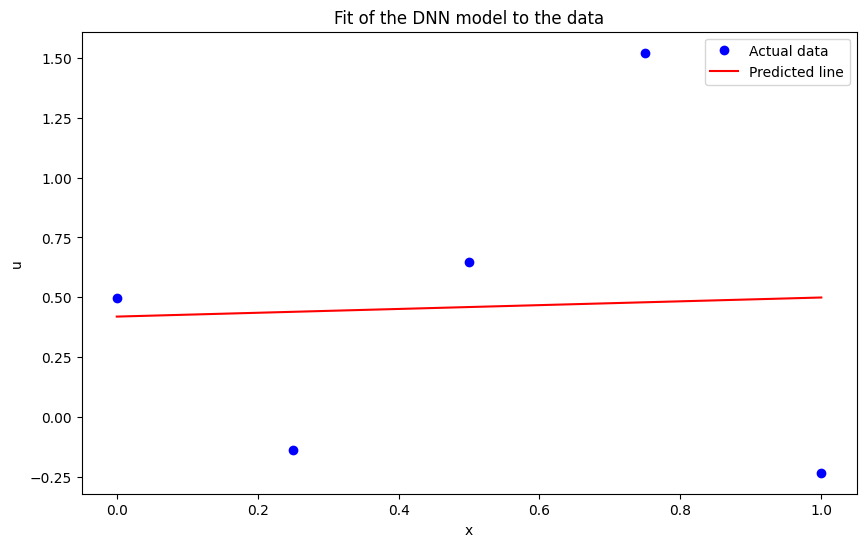

Training time: 11.25687050819397


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant
import time

# 재연 가능성 설정을 위한 시드 고정
np.random.seed(42)
tf.random.set_seed(42)

def generate_data(n):
    x_train = np.linspace(0,1,n)
    u_train = np.random.randn(n, 1)
    return x_train, u_train

# 임의 데이터 생성
n = 5  # 예시로 n개 데이터 생성
x_train, u_train = generate_data(n)

# Define the model
k = 5
model = Sequential()
model.add(Dense(k, input_dim=1, activation='relu'))
model.add(Dense(k, activation='relu'))
model.add(Dense(k, activation='relu'))
model.add(Dense(k, activation='relu'))
model.add(Dense(1, activation='linear'))

# 고정된 학습률 설정
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

print(model.summary())

start = time.time()

# 모델 피팅
model.fit(x_train, u_train, epochs=500, verbose=1)
end = time.time()

# 예측 값
x = np.linspace(0, 1, 100)
u_pred = model.predict(x_train)

# 피팅 결과 plot
plt.figure(figsize=(10, 6))
plt.plot(x_train, u_train, 'bo', label='Actual data')
plt.plot(x_train, u_pred, 'r-', label='Predicted line')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.title('Fit of the DNN model to the data')
plt.show()

print("Training time:", end - start)
